In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import lilliefors

sns.set()

df = pd.read_excel('db.xlsx')
df.head()

,Дата для смены,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
0,2022-10-01,10,1,1035,228.500000,25.99,17.731667,152.283333,66.851789,575.0
1,2022-10-01,10,1,1037,214.818182,80.42,17.938182,125.609091,48.356601,1795.0
2,2022-10-01,10,1,1039,221.533333,73.36,16.754000,179.664286,70.469738,1688.0
3,2022-10-01,10,1,1040,229.466667,94.95,16.555333,NaN,NaN,1865.0
4,2022-10-01,10,1,1042,NaN,60.46,NaN,77.514286,47.216396,1519.0


In [2]:
df.count()

Дата для смены                19057
Месяц                         19057
Смена                         19057
Самосвал                      19057
Avg-Вес по СКЗ, т             17937
Sum-Расстояние, км            18552
Avg-Средняя скорость, км/ч    18275
Avg-Перепад высот             17242
StDev-Перепад высот           18118
Расход топлива, л             18337
dtype: int64

In [3]:
df.tail()

,Дата для смены,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
19052,2022-03-31,3,2,1499,213.125000,95.37,18.866875,130.162500,41.011882,1752.0
19053,2022-03-31,3,2,1502,211.866667,46.54,NaN,217.707692,99.846286,1302.0
19054,2022-03-31,3,2,1503,226.937500,82.54,16.953750,179.475000,70.083774,1775.0
19055,2022-03-31,3,2,1504,219.066667,93.79,20.134000,139.846667,18.230816,1636.0
19056,2022-03-31,3,2,1505,221.176471,53.45,NaN,229.346667,99.174693,1687.0


In [4]:
df.describe()

,Дата для смены,Месяц,Смена,Самосвал,"Avg-Вес по СКЗ, т","Sum-Расстояние, км","Avg-Средняя скорость, км/ч",Avg-Перепад высот,StDev-Перепад высот,"Расход топлива, л"
count,19057,19057.000000,19057.000000,19057.000000,17937.000000,18552.000000,18275.000000,17242.000000,18118.000000,18337.000000
mean,2022-06-17 02:58:42.359238144,6.048696,1.499082,1332.006822,221.680695,81.245005,19.401021,114.328822,36.140689,1550.970333
min,2022-01-01 00:00:00,1.000000,1.000000,1035.000000,190.000000,20.010000,15.001667,-49.918182,0.000000,500.000000
25%,2022-03-26 00:00:00,3.000000,1.000000,1044.000000,216.541667,72.390000,18.318582,79.455385,8.799751,1380.000000
50%,2022-06-18 00:00:00,6.000000,1.000000,1385.000000,223.444444,84.570000,19.513448,119.026500,29.265572,1594.000000
75%,2022-09-09 00:00:00,9.000000,2.000000,1493.000000,228.272727,94.170000,20.540000,154.990170,56.853116,1774.000000
max,2022-11-26 00:00:00,11.000000,2.000000,1888.000000,249.562500,119.950000,24.975200,249.875000,320.915607,2486.000000
std,NaN,3.085022,0.500012,196.299550,9.585327,18.486391,1.742872,62.489313,31.579008,327.096777


In [5]:
print(df.isnull().sum ())
print(f'Общее количество пропусков в датасете = {df.isnull().sum().sum ()}')

Дата для смены                   0
Месяц                            0
Смена                            0
Самосвал                         0
Avg-Вес по СКЗ, т             1120
Sum-Расстояние, км             505
Avg-Средняя скорость, км/ч     782
Avg-Перепад высот             1815
StDev-Перепад высот            939
Расход топлива, л              720
dtype: int64
Общее количество пропусков в датасете = 5881


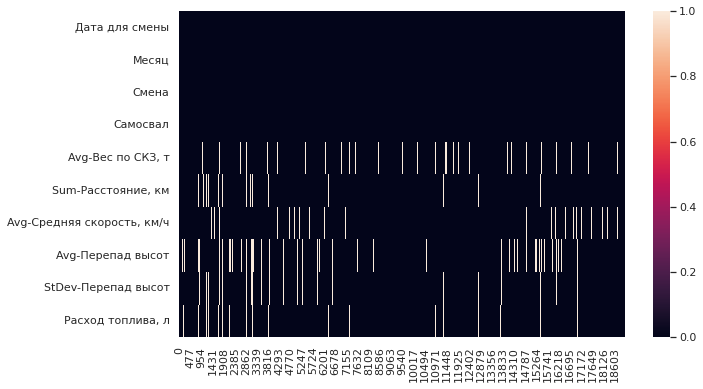

In [6]:
#визуализируем пропуски
# x - строки
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().transpose())
plt.savefig('/home/anya-mankova/emco/images/nullst.png', dpi=70)

Количество наблюдений 17937


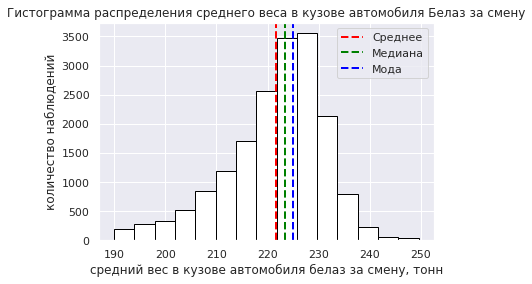

In [7]:
avg_weight = df['Avg-Вес по СКЗ, т'].dropna()
print(f'Количество наблюдений {avg_weight.count()}')
# 17937 строк с данными


plt.hist(avg_weight, bins=15, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('средний вес в кузове автомобиля белаз за смену, тонн')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения среднего веса в кузове автомобиля Белаз за смену')
plt.axvline(avg_weight.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(avg_weight.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(avg_weight.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.savefig('/home/anya-mankova/emco/images/avg_weight/aw_hist.png', dpi=80)
plt.show()

In [72]:
print("Дисперсия: ", round(np.var(avg_weight), 3))
print("Стандартное отклонение: ", round(np.std(avg_weight), 3))
print("Коэффициент вариации: ", round(avg_weight.std() / avg_weight.mean(), 3))
print("Межквартильный размах: ", round(avg_weight.quantile(0.75) - avg_weight.quantile(0.25), 3))

Дисперсия:  91.873
Стандартное отклонение:  9.585
Коэффициент вариации:  0.043
Межквартильный размах:  11.731


Для проверки гипотезы о среднем значении выборки на основе данной информации можно использовать t-тест Стьюдента. Попытаемся определить, насколько вероятно, что наши результаты отражают реальные различия в исследуемой генеральной совокупности, а не просто случайность или шум в данных.
Нулевая гипотеза - две выборки имеют одинаковые средние значения

Когда мы применяем t-тест, мы сравниваем две выборки, сравнивая их средние значения и стандартные отклонения. Тест вычисляет t-статистику, которая показывает, насколько различны средние значения выборок относительно их стандартных отклонений. Значение t-статистики сравнивается с табличным значением, определенным на основе уровня доверия и степеней свободы. Если t-статистика превышает табличное значение, то мы можем отвергнуть нулевую гипотезу и сделать вывод, что между выборками существует статистически значимое различие. Если значение t-статистики меньше табличного, то мы не можем отвергнуть нулевую гипотезу, и мы не можем сказать, что различия статистически значимы.

P-значение означает, насколько вероятно, что различия, которые мы наблюдаем в выборках, могут быть случайными. Если p-значение меньше уровня значимости, то мы можем считать, что различия статистически значимы. Если же p-значение больше уровня значимости, то мы не можем отвергнуть нулевую гипотезу, и мы не можем считать, что различия статистически значимы.

уровень значимости = 5%
уровень доверия = 95%

In [112]:
def rand_sample(data, size):
    return data.sample(n=size)

In [114]:
from statsmodels.stats.power import ttest_power

sample1_avg_weight = rand_sample(avg_weight, 30)
sample2_avg_weight = rand_sample(avg_weight, 30)

t_statistic, p_value = ttest_ind(sample1_avg_weight, sample2_avg_weight)

print("t-статистика:", t_statistic)
print("p-значение:", p_value)

t-статистика: -0.9113724506188735
p-значение: 0.36587157308692597


In [98]:
from scipy.stats import ttest_ind

sample_avg_weight = avg_weight.sample(n=79)
#тест Шапиро=Уилка, 
stat, p = shapiro(sample_avg_weight)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Распределение похоже на нормальное (не отвергаем H0)')
else:
    print('Распределение не похоже на нормальное (отвергаем H0)')
    
#тест Лиллиефорса, используют если в выборке есть выбросы
stat, p = lilliefors(sample_avg_weight)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
if p > alpha:
    print('Распределение похоже на нормальное (не отвергаем H0)')
else:
    print('Распределение не похоже на нормальное (отвергаем H0)')

Statistics=0.959, p=0.013
Распределение не похоже на нормальное (отвергаем H0)
Statistics=0.114, p-value=0.022
Распределение не похоже на нормальное (отвергаем H0)


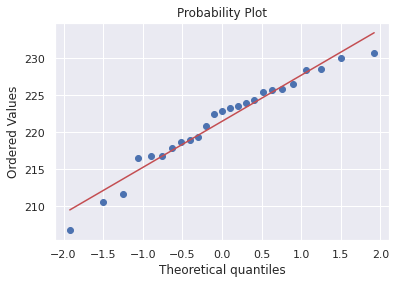

In [62]:
stats.probplot(sample_avg_weight, dist="norm", plot=plt)
plt.savefig('/home/anya-mankova/emco/images/avg_weight/aw_qqplot.png', dpi=50)
plt.show()

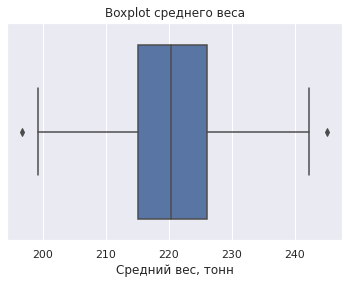

In [55]:
plt.figure(facecolor='white')
sns.boxplot(x=sample_avg_weight)
plt.xlabel('Средний вес, тонн')
plt.title('Boxplot среднего веса')
plt.savefig('/home/anya-mankova/emco/images/avg_weight/aw_boxplot.png', dpi=50)
plt.show()

 Количество наблюдений 17242


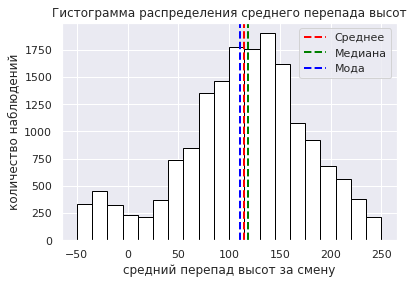

In [11]:
avg_height = df['Avg-Перепад высот'].dropna()
print(f' Количество наблюдений {avg_height.count()}')
# 17242 строк с данными
plt.hist(avg_height, bins=20, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('средний перепад высот за смену')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения среднего перепада высот')
plt.axvline(avg_height.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(avg_height.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(avg_height.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.savefig('/home/anya-mankova/emco/images/avg_height/ah_hist.png', dpi=100)
plt.show()

In [12]:
print("Дисперсия: ", np.var(avg_height))
print("Стандартное отклонение: ", np.std(avg_height))
print("Коэффициент вариации: ", avg_height.std() / avg_height.mean())
print("Межквартильный размах: ", avg_height.quantile(0.75) - avg_height.quantile(0.25))
print()

#тест Лиллиефорса
test_stat, p_value = lilliefors(avg_height, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 3)}')

Дисперсия:  3904.6878013730147
Стандартное отклонение:  62.48750116121635
Коэффициент вариации:  0.5465753265766312
Межквартильный размах:  75.53478566325285

Тест Лиллиефорса: критерий = 0.042, p-val = 0.001


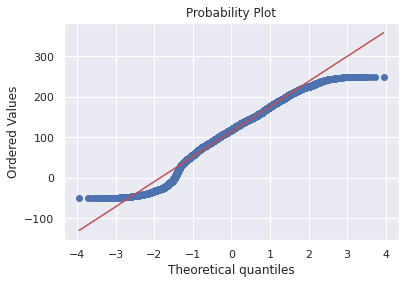

In [13]:
stats.probplot(avg_height, dist="norm", plot=plt)
plt.savefig('/home/anya-mankova/emco/images/avg_height/ah_qqplot.png', dpi=50)
plt.show()

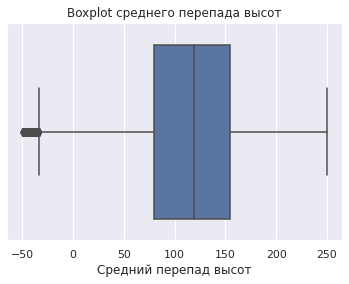

In [14]:
plt.figure(facecolor='white')
sns.boxplot(x=avg_height)
plt.xlabel('Средний перепад высот')
plt.title('Boxplot среднего перепада высот')
plt.savefig('/home/anya-mankova/emco/images/avg_height/ah_boxplot.png', dpi=50)
plt.show()

 Количество наблюдений 18552


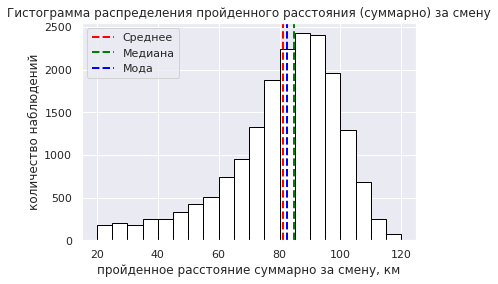

In [15]:
dist = df['Sum-Расстояние, км'].dropna()
print(f' Количество наблюдений {dist.count()}')
# 18552 строки с данными
plt.hist(dist, bins=20, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('пройденное расстояние суммарно за смену, км')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения пройденного расстояния (суммарно) за смену')
plt.axvline(dist.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(dist.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(dist.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.savefig('/home/anya-mankova/emco/images/dist/dist_hist.png', dpi=100)
plt.show()

In [16]:
print("Дисперсия: ", np.var(dist))
print("Стандартное отклонение: ", np.std(dist))
print("Коэффициент вариации: ", dist.std() / dist.mean())
print("Межквартильный размах: ", dist.quantile(0.75) - dist.quantile(0.25))
print()

#тест Лиллиефорса
test_stat, p_value = lilliefors(dist, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 3)}')

Дисперсия:  341.72823047647495
Стандартное отклонение:  18.48589274220953
Коэффициент вариации:  0.22753880087186099
Межквартильный размах:  21.78

Тест Лиллиефорса: критерий = 0.086, p-val = 0.001


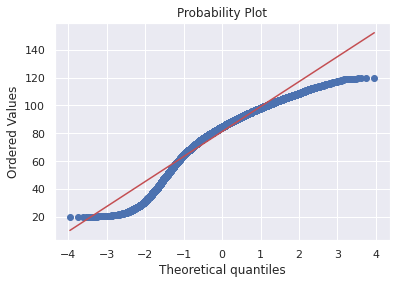

In [17]:
stats.probplot(dist, dist="norm", plot=plt)
plt.savefig('/home/anya-mankova/emco/images/dist/dist_qqplot.png', dpi=50)
plt.show()

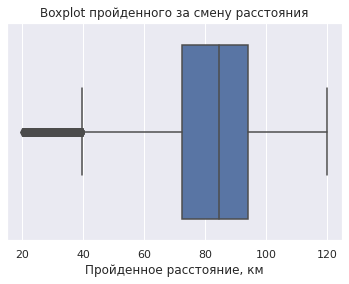

In [18]:
plt.figure(facecolor='white')
sns.boxplot(x=dist)
plt.xlabel('Пройденное расстояние, км')
plt.title('Boxplot пройденного за смену расстояния')
plt.savefig('/home/anya-mankova/emco/images/dist/dist_boxplot.png', dpi=50)
plt.show()

 Количество наблюдений 18275


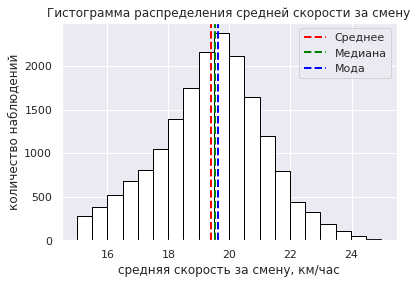

In [19]:
avg_speed = df['Avg-Средняя скорость, км/ч'].dropna()
print(f' Количество наблюдений {avg_speed.count()}')
# 18275 строк с данными
plt.hist(avg_speed, bins=20, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('средняя скорость за смену, км/час')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения средней скорости за смену')
plt.axvline(avg_speed.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(avg_speed.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(avg_speed.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.savefig('/home/anya-mankova/emco/images/avg_speed/as_hist.png', dpi=100)
plt.show()

In [20]:
print("Дисперсия: ", np.var(avg_speed))
print("Стандартное отклонение: ", np.std(avg_speed))
print("Коэффициент вариации: ", avg_speed.std() / avg_speed.mean())
print("Межквартильный размах: ", avg_speed.quantile(0.75) - avg_speed.quantile(0.25))
print()

#тест Лиллиефорса
test_stat, p_value = lilliefors(avg_speed, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 3)}')

Дисперсия:  3.0374371344486972
Стандартное отклонение:  1.7428244703494087
Коэффициент вариации:  0.08983404461678608
Межквартильный размах:  2.2214177489176983

Тест Лиллиефорса: критерий = 0.033, p-val = 0.001


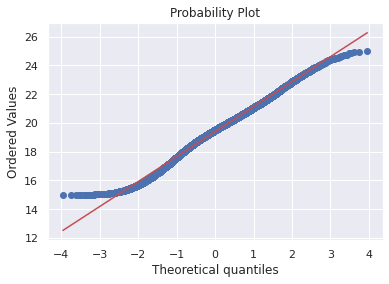

In [21]:
stats.probplot(avg_speed, dist="norm", plot=plt)
plt.savefig('/home/anya-mankova/emco/images/avg_speed/as_qqplot.png', dpi=50)
plt.show()

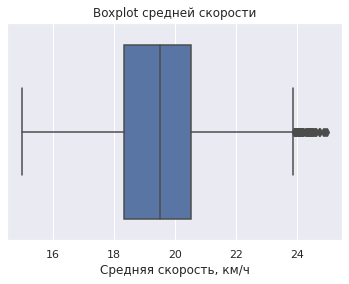

In [22]:
plt.figure(facecolor='white')
sns.boxplot(x=avg_speed)
plt.xlabel('Средняя скорость, км/ч')
plt.title('Boxplot средней скорости')
plt.savefig('/home/anya-mankova/emco/images/avg_speed/as_boxplot.png', dpi=50)
plt.show()

Количество наблюдений 18337


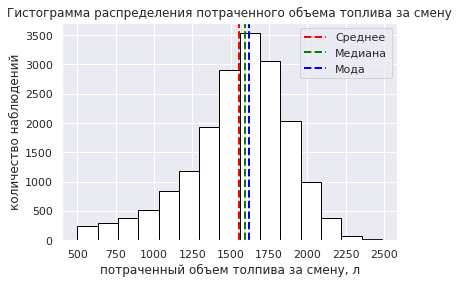

Все моды потраченного топлива: 1621.0, 1632.0, 1639.0


In [23]:
fuel = df['Расход топлива, л'].dropna()
print(f'Количество наблюдений {fuel.count()}')
# 18337 строк с данными
plt.hist(fuel, bins=15, edgecolor='black', color='#E6E6FA', facecolor='white')

plt.xlabel('потраченный объем толпива за смену, л')
plt.ylabel('количество наблюдений')
plt.title('Гистограмма распределения потраченного объема топлива за смену')
plt.axvline(fuel.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(fuel.median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(fuel.mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()

plt.savefig('/home/anya-mankova/emco/images/fuel/fuel_hist.png', dpi=100)
plt.show()

print(f'Все моды потраченного топлива: {", ".join(map(str, fuel.mode().tolist()))}')

In [24]:
print("Дисперсия: ", np.var(fuel))
print("Стандартное отклонение: ", np.std(fuel))
print("Коэффициент вариации: ", fuel.std() / fuel.mean())
print("Межквартильный размах: ", fuel.quantile(0.75) - fuel.quantile(0.25))
print()

#тест Лиллиефорса
test_stat, p_value = lilliefors(fuel, dist='norm')
print(f'Тест Лиллиефорса: критерий = {round(test_stat, 3)}, p-val = {round(p_value, 5)}')

Дисперсия:  106986.46691723098
Стандартное отклонение:  327.08785810120037
Коэффициент вариации:  0.21089815211618876
Межквартильный размах:  394.0

Тест Лиллиефорса: критерий = 0.066, p-val = 0.001


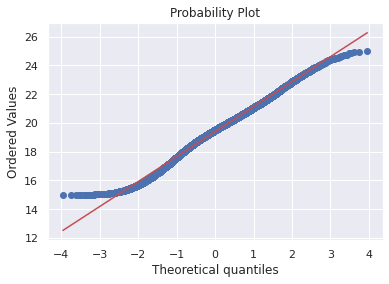

In [25]:
stats.probplot(avg_speed, dist="norm", plot=plt)
plt.savefig('/home/anya-mankova/emco/images/fuel/fuel_qqplot.png', dpi=50)
plt.show()

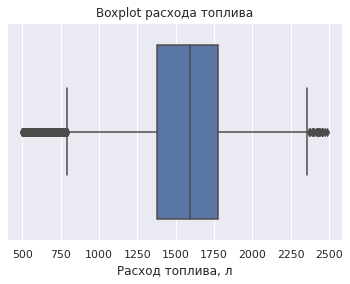

In [26]:
plt.figure(facecolor='white')
sns.boxplot(x=fuel)
plt.xlabel('Расход топлива, л')
plt.title('Boxplot расхода топлива')

plt.savefig('/home/anya-mankova/emco/images/fuel/fuel_boxplot.png', dpi=50)
plt.show()

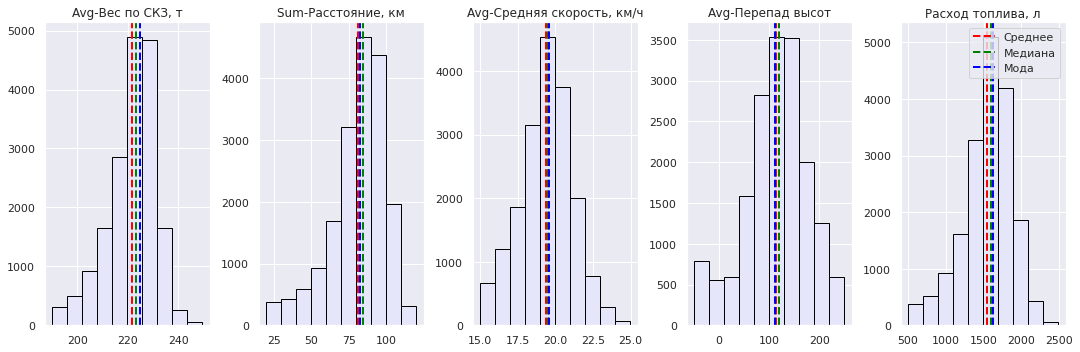

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5), facecolor='white')

for i, column in enumerate(df[['Avg-Вес по СКЗ, т', 'Sum-Расстояние, км', 'Avg-Средняя скорость, км/ч', 'Avg-Перепад высот', 'Расход топлива, л']]):
    axes[i].hist(df[column], bins=10, edgecolor='black', color='#E6E6FA')
    axes[i].set_title(column)
    axes[i].axvline(df[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее')
    axes[i].axvline(df[column].median(), color='green', linestyle='dashed', linewidth=2, label='Медиана')
    axes[i].axvline(df[column].mode().iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Мода')
plt.legend()
plt.tight_layout()
plt.savefig('/home/anya-mankova/emco/images/all_hist.png', dpi=100)
plt.show()


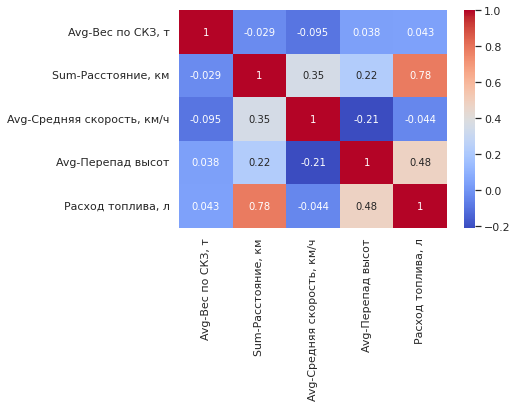

In [28]:
corr = df[['Avg-Вес по СКЗ, т', 'Sum-Расстояние, км', 'Avg-Средняя скорость, км/ч', 'Avg-Перепад высот', 'Расход топлива, л']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.savefig('/home/anya-mankova/emco/images/corr.png', dpi=80)

In [29]:
import sklearn
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df[['Avg-Вес по СКЗ, т', 'Sum-Расстояние, км', 'Avg-Средняя скорость, км/ч', 'Avg-Перепад высот', 'StDev-Перепад высот', 'Расход топлива, л']].dropna())
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1,2,3,4,5
0,0.292760,-0.880328,-0.452551,0.348940,-0.585425,-0.924089
1,-0.166651,0.208925,-0.411138,0.170989,-0.700840,0.310729
2,0.058832,0.067641,-0.648603,0.531606,-0.562848,0.202429
3,0.134942,0.506304,-0.305295,0.947686,-0.971342,0.701417
4,0.095488,-0.235141,-0.160612,0.076905,-0.783998,-0.074899


In [30]:
headers = ['Avg-Вес по СКЗ, т', 'Sum-Расстояние, км', 'Avg-Средняя скорость, км/ч', 'Avg-Перепад высот', 'StDev-Перепад высот', 'Расход топлива, л']
df_norm.columns = headers

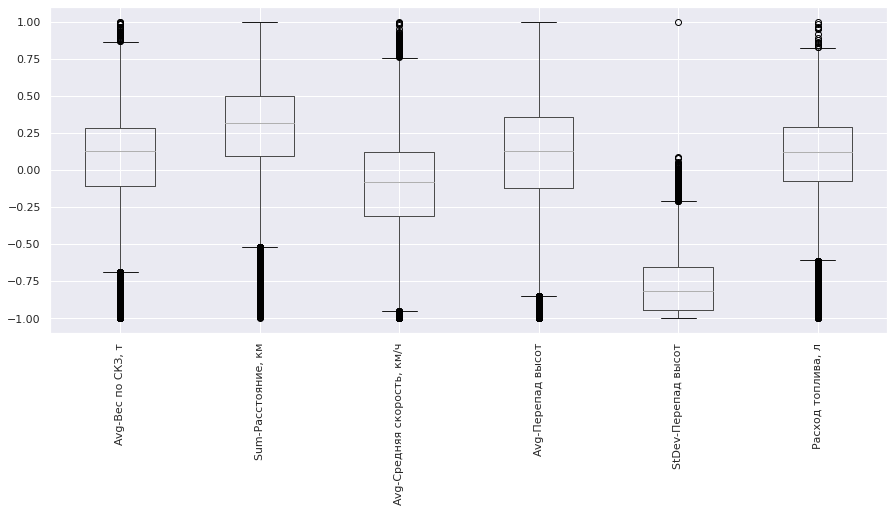

In [31]:
boxplot = df_norm.boxplot(figsize=(15,6), rot=90)
plt.savefig('/home/anya-mankova/emco/images/all_qqplot.png', dpi=100)